# 웨이트 초기값
Dense() 생성시에 kernel_initializer, bias_initializer로 설정

- 'he_normal'
- 'lecun_normal'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

# 학습되지 않는 랜덤함수
x와 y간의 관계가 없는 경우 (입출력간 관계없는 함수)

=> 학습이 안됨

# 오버피팅 처리
오버피팅의 근본적인 문제 -> 적은 데이터 양

*오버피팅의 발생

val_loss와 train_loss 차이가 큰 경우 (train_loss < val_acc)

train_acc와 val_acc 차이가 큰 경우(train_acc > val_acc)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

## 데이터 준비

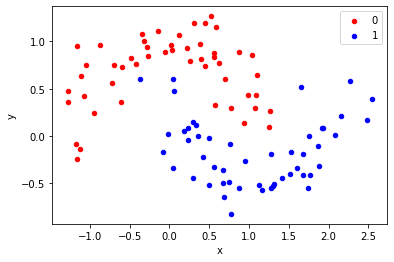

In [ ]:
from sklearn.datasets import make_moons


# 데이터 생성 (노이즈 추가된 데이터)
x, y = make_moons(n_samples=100, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 아무 처리 안했을 때

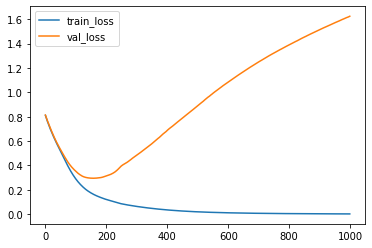

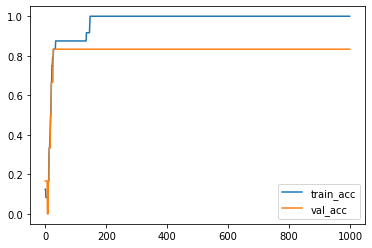

In [ ]:
model = Sequential()
model.add(Input(2)) # x,y 좌표 2개
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax")) # 출력 빨강, 파란점 2개
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

base_history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(base_history.history['acc'], label='train_acc')
plt.plot(base_history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

## DropOut
사용법 : 레이어와 레이어 사이에 추가

오버피팅을 막기위해
특정 확률값으로 선택된 노드들을 제거 (노이즈 추가와 같은역할)

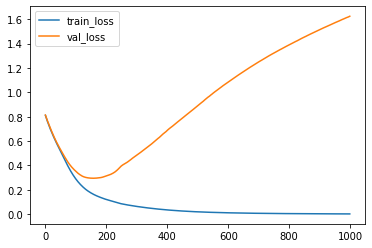

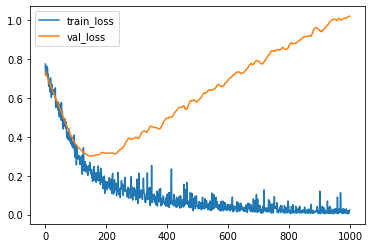

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### 표준화, 정규화 스케일링 이유
표준화, 정규화 해주지 않으면 학습이 진행은 되지만, 더디게 진행

## BatchNormalization
사용법 : 레이어와 레이어 사이에 추가

전처리에서 스케일링된 데이터를 한번 더 정규화해줌

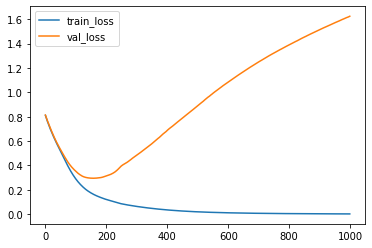

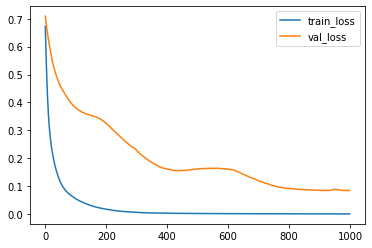

In [ ]:
from tensorflow.keras.layers import BatchNormalization


model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

성능이 개선되진않았지만 오버피팅이 줄어들어있음

# Regularization

Dense() 생성시에 kernel_regularization, bias_regularization으로 설
- l1()
- l1_l2()
- l2()

가중치가 너무 커지지 않도록 조절

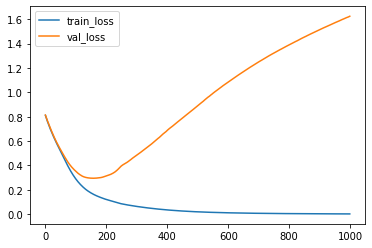

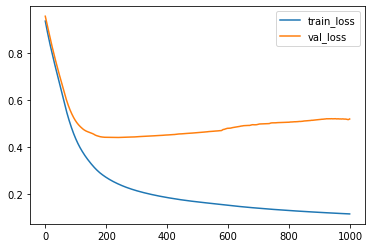

In [ ]:
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input(2))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

성능이 좋아지진 않았음

## 위 3개 동시 사용
순서중요!

Dropout보다 BatchNormalization을 먼저 써야함

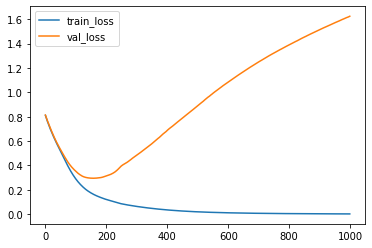

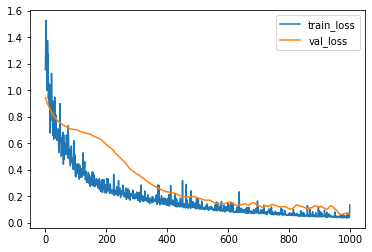

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

오버피팅이 확실히 줄어들어있음

마지막 부분은 오버피팅이라고 확정짓기는 어려움.
더 학습시키면 줄어들 가능성이 있음

## 데이터를 10배로 늘려준 경우

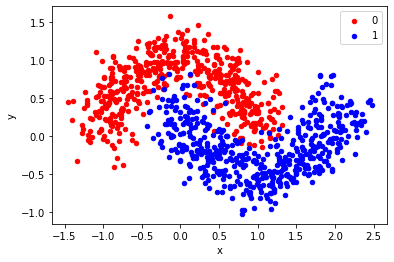

In [ ]:
from sklearn.datasets import make_moons


# 데이터 생성
# x, y = make_moons(n_samples=100, noise=0.2, random_state=32)
x, y = make_moons(n_samples=100*10, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

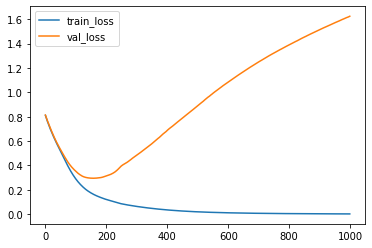

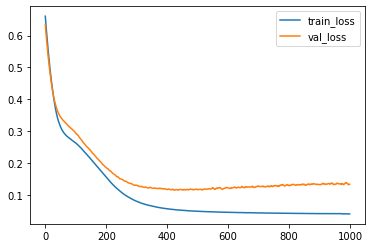

In [ ]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

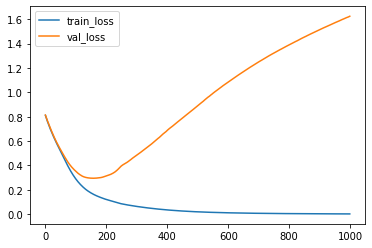

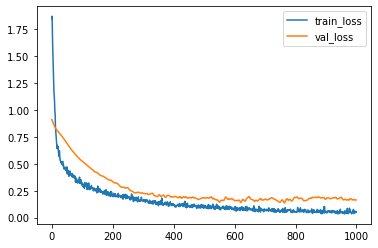

In [ ]:
# 오버피팅 완화법 3가지 모두 사용
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()